#  <span style="color:Indigo"> Credit Card Fraud Detection

# <span style="color:purple">Our Goal-
Identify fraud credit card transactions using their credit card activity information.
For addition infromation please refer to the attached PDF.

In [130]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

## <span style="color:purple"> Data Set Description- 
Our goal in this section is to explore the data set and find which parameters correlate to Fraud behavior.
According to our findings, we will choose and optimize a classification algorithm to predict whether a transaction is a legitamate one or a fraud.

In [131]:
data=pd.read_csv('./creditcard.csv')


In [132]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


According to this, our data includes 284807 transactions (columns), and v1-v28 are fitcher that we will use in order to predict if the transaction is a fraud. in addition to this, we have the amount and the time of each transaction.

In [133]:
count_Legit= len(data[data['Class']==0])
count_Frude= len(data[data['Class']==1])
pct_of_Legit=count_Legit/(count_Legit+count_Frude)
print("\033[1m Precentage of legit transaction is\033[1m",pct_of_Legit*100)
pct_of_Frude=count_Frude/(count_Legit+count_Frude)
print("\033[1m Precentage of frude transaction is\033[1m",pct_of_Frude*100)

 Precentage of legit transaction is 99.82725143693798
 Precentage of frude transaction is 0.1727485630620034


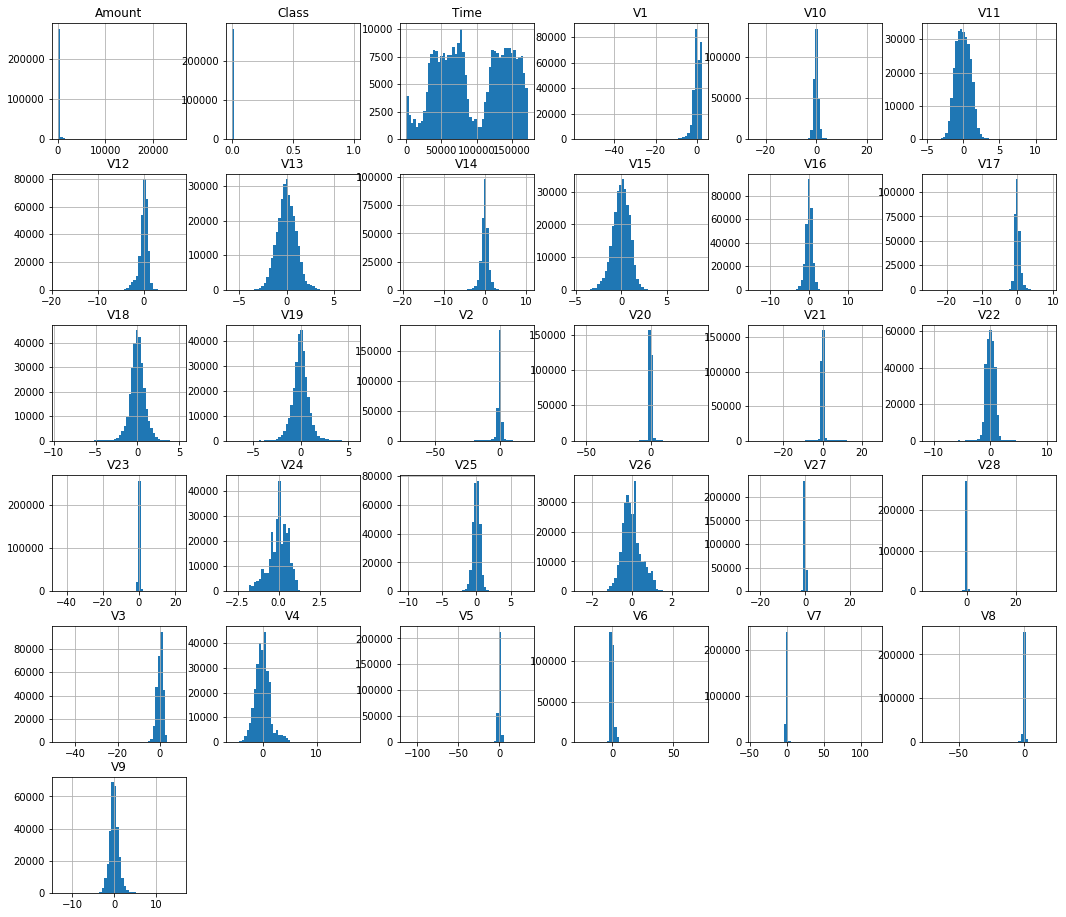

In [134]:
data.hist(bins=50, figsize=(18,16))
plt.show()

Moreover, in the full data set we have too many "Legit" transactions, and in order to make the set be lighter we will use a modify vertion of the data- set that we will reduse part of his "Legit" transaction. in this set the difference between the "Fraud" and the "Legit" transaction will be smaller.

In [135]:
class0 = data[data.Class == 0]
class1 = data[data.Class == 1]

In [136]:
data_copy = data.copy()
data_crop = data_copy[data_copy.Class==0]
Legit = data_crop.sample(frac = 0.05)
new_dataset = pd.concat([Legit,class1])

In [137]:
print(new_dataset)

            Time        V1        V2        V3        V4        V5        V6  \
8437     11319.0  0.310035  1.930673 -1.926568  1.824349  0.996577 -1.228327   
113264   72998.0  1.136992  0.106427  0.289390  0.892783 -0.073193  0.074396   
68983    53215.0  1.081011 -0.256119  0.788211  1.281187 -0.698987  0.235786   
10277    16163.0 -0.385372  1.085612  1.562856  1.498063  0.118136  0.075954   
266847  162509.0  1.928146 -0.188099 -0.787256  0.252817 -0.308491 -1.164406   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

According to this, our data includes 284807 transactions (columns), and v1-v28 are fitcher that we will use in order to predict if the transaction is a fraud. in addition to this, we have the amount and the time of each transaction.

In [138]:
count_Legit= len(Legit)
count_Frude= len(new_dataset[new_dataset['Class']==1])

pct_of_Legit=count_Legit/(count_Legit+count_Frude)
print("\033[1m Precentage of legit transaction is\033[1m",pct_of_Legit*100)
pct_of_Frude=count_Frude/(count_Legit+count_Frude)
print("\033[1m Precentage of frude transaction is\033[1m",pct_of_Frude*100)

 Precentage of legit transaction is 96.65488169703562
 Precentage of frude transaction is 3.3451183029643734


([<matplotlib.patches.Wedge at 0x2ec5660cd88>,
 [Text(-1.093931439157568, -0.11538633551097728, 'Fraud'),
  Text(1.3922763839844252, 0.14685527092771883, 'Legit')],
 [Text(-0.596689875904128, -0.06293800118780578, '3.35%'),
  Text(0.8950348182757017, 0.09440695988210494, '96.65%')])

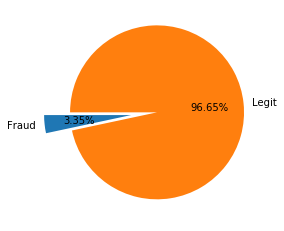

In [139]:
Frude=new_dataset[new_dataset.Class==1]
Legit= Legit
counts = [Frude.shape[0], Legit.shape[0]]
labels = ['Fraud','Legit']
plt.pie(counts, labels=labels, 
          autopct="%0.2f%%", 
          explode=[0, 0.3], #מרחב בין החלקים (הרחקה)
          startangle=180) #סיבוב העיגול

In [140]:
new_dataset['Class'].value_counts()

0    14216
1      492
Name: Class, dtype: int64

Since we remove 95% from the Legit transactions, we received a more balanced dataset.
We decided to use a dataset that includes more than 10K transactions but less than the original. The main reason was to avoid a slower analysis.We do consider using the SMOTE method to make more "Frude transactions" in a synthetic way. However, we decided that it may increase the error level, and we only removed part of the legit transactions.

# <span style="color:purple"> Classification Algorithms 

In this section, we will try out different classification algorithms to find the best prediction model for identifying credit card scammers activity.
* The first step will be to create random training and testing sets (Ratio of 80:20). 
* We will scale our data by using the MinMax method.
* We will try different algorithms to reach the best classification score.

In [141]:
from sklearn import svm
from sklearn import neighbors 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

scaler = MinMaxScaler()

In [142]:
x = new_dataset[:]
y = new_dataset['Class']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## <span style="color:HotPink"> Dummy Classifiers

In [146]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

dummy_majority = DummyClassifier(
    strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

dummy_majority.score(X_test, y_test)

0.9689964645091107

Dummy Classifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.
The following result will be baseline for comparison against  our actual classifiers.

## <span style="color:HotPink"> Linear regression

In [147]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression().fit(X_train , y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squard score (training): {:.3f}'.format(linreg.score(X_train , y_train)))
print('R-squard score (test): {:.3f}'.format(linreg.score(X_train , y_train)))
print('Conclusion- for Linear Regression the model result is over fitting.')

linear model coeff (w): [-2.88957328e-21 -1.05657662e-16  7.72193625e-17 -5.92038507e-17
 -4.66399334e-17  2.19822753e-17  1.03579683e-16 -1.46288506e-16
  8.34212988e-18  1.35631592e-16  1.01094178e-16  2.67245604e-16
  2.74134476e-16  7.81948997e-17 -5.66225064e-17 -2.68931443e-17
  3.08251645e-17 -3.06166357e-16  2.26396191e-18  1.46452785e-16
 -1.43324839e-16 -1.48999748e-18 -1.67924359e-16  1.41724955e-16
  1.61561694e-17  2.11181187e-17  3.18893500e-17  5.90017939e-18
  4.77878214e-16 -1.66884914e-16  1.00000000e+00]
linear model intercept (b): 0.000
R-squard score (training): 1.000
R-squard score (test): 1.000
Conclusion- for Linear Regression the model result is over fitting.


#### <span style="color:pink"> Ridge

In [148]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)

print('R-squard score (training): {:.3f}'.format(linridge.score(X_train_scaled , y_train)))
print('R-squard score (test): {:.3f}'.format(linridge.score(X_test_scaled , y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ !=0)))
print('Conclusion- We can see that the Ridge model give us good result and we may use the Ridge model for our goal.')

R-squard score (training): 0.995
R-squard score (test): 0.995
Number of non-zero features: 31
Conclusion- We can see that the Ridge model give us good result and we may use the Ridge model for our goal.


#### <span style="color:pink"> Lasso

In [149]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha = 5.0, max_iter = 1000).fit(X_train, y_train)
print('Lasso:')
print('Accutacy of Lasso regression classifier on training set: {:.2f}'.format(linlasso.score(X_train, y_train)))
print('Accutacy of Lasso regression classifier on test set: {:.2f}'.format(linlasso.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linlasso.coef_ !=0)))

Lasso:
Accutacy of Lasso regression classifier on training set: 0.00
Accutacy of Lasso regression classifier on test set: 0.00
Number of non-zero features: 1


In [150]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha = 6.0, max_iter = 1000).fit(X_train_scaled, y_train)

print('Lasso scaled:')
print('R-squard score (training): {:.3f}'.format(linlasso.score(X_train_scaled , y_train)))
print('R-squard score (test): {:.3f}'.format(linlasso.score(X_test_scaled , y_test)))
print('Number of non-zero features: {}'.format(np.sum(linlasso.coef_ !=0)))
print('The reason we got the follow result is beacuse when we using Lasso model when there is only a few variables with medium/large effect. In our dataset we have alot of variables.')

Lasso scaled:
R-squard score (training): 0.000
R-squard score (test): -0.000
Number of non-zero features: 0
The reason we got the follow result is beacuse when we using Lasso model when there is only a few variables with medium/large effect. In our dataset we have alot of variables.


#### <span style="color:pink"> LogisticRegression

In [151]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(C=1.).fit(X_train, y_train)
print('Accutacy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accutacy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accutacy of Logistic regression classifier on training set: 0.99
Accutacy of Logistic regression classifier on test set: 0.99


C:\Users\julia.denisov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## <span style="color:HotPink"> SVM

In [152]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)
print('Accutacy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accutacy of Linear SVC classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accutacy of Linear SVC classifier on training set: 0.97
Accutacy of Linear SVC classifier on test set: 0.98


C:\Users\julia.denisov\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [153]:
clf = LinearSVC(C=5).fit(X_train, y_train)
print('Accutacy of Linear SVC classifier with c=5 on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accutacy of Linear SVC classifier with c=5 on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accutacy of Linear SVC classifier with c=5 on training set: 0.97
Accutacy of Linear SVC classifier with c=5 on test set: 0.97


C:\Users\julia.denisov\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [154]:
clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Accutacy of Linear SVC classifier with c=5 and random_state = 67 on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accutacy of Linear SVC classifier with c=5 and random_state = 67 set: {:.2f}'.format(clf.score(X_test, y_test)))

Accutacy of Linear SVC classifier with c=5 and random_state = 67 on training set: 0.97
Accutacy of Linear SVC classifier with c=5 and random_state = 67 set: 0.98


C:\Users\julia.denisov\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [155]:
clf = LinearSVC(random_state = 88).fit(X_train, y_train)
print('Accutacy of Linear SVC classifier with random_state = 67 on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accutacy of Linear SVC classifier with random_state = 67 set: {:.2f}'.format(clf.score(X_test, y_test)))

Accutacy of Linear SVC classifier with random_state = 67 on training set: 0.97
Accutacy of Linear SVC classifier with random_state = 67 set: 0.98


C:\Users\julia.denisov\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Conclusion- according to the above for LinearSVC the best result we received with C=5/ random state = 88.

In [156]:
from sklearn.svm import SVC

clf = SVC(C=100.).fit(X_train_scaled, y_train)
print('Dataset normalized with MinMax scaling:')
print('Accutacy of RBF-kernel SVC classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accutacy of RBF-kernel SVC classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))
print('Conclusion-Over fitting')

Dataset normalized with MinMax scaling:
Accutacy of RBF-kernel SVC classifier on training set: 1.00
Accutacy of RBF-kernel SVC classifier on test set: 1.00
Conclusion-Over fitting


In [157]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9847701930921947

## <span style="color:HotPink"> KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.9687245036714713

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 7)

knn2.fit(X_train, y_train)
knn2.score(X_test, y_test)


0.970628229534947

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(X_train, y_train)
knn3.score(X_test, y_test)

0.9676366603209138

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn8 = KNeighborsClassifier(n_neighbors = 8)

knn8.fit(X_train, y_train)
knn8.score(X_test, y_test)

0.9703562686973076

Conclusion- according to the above for KNN the best result we received with n=7

## <span style="color:HotPink"> K Means

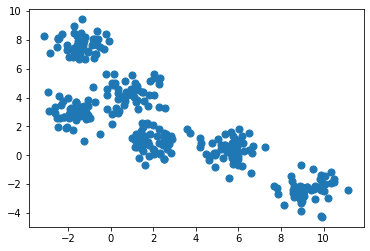

In [160]:
from sklearn.datasets.samples_generator import make_blobs
x, y_train = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.70, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=50);

In [161]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

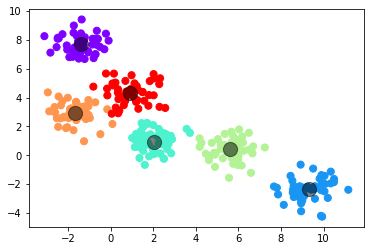

In [164]:
#Let's visualize the results by plotting the data colored by these labels. 
# We will also plot the cluster centers as determined by the k-means estimator:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## <span style="color:HotPink"> DecisionTree

#### <span style="color:pink"> DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
#since we use this model and we noticed that we have over fitting we try to use some hyper parmaters:
clf = DecisionTreeClassifier(max_depth = 7, random_state = 0).fit(X_train, y_train)


print('Accuracy of DT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('Conclusion-Over fitting')

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 1.00
Conclusion-Over fitting


#### <span style="color:pink"> RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features = 4, random_state = 0)
clf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Conclusion-Over fitting')

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 1.00


#### <span style="color:pink"> Gradient-boosted decision trees

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf2 = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf2.fit(X_train, y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))
print('Conclusion-Over fitting')

Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 1.00

Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 1.00
Conclusion-Over fitting


Even though we used hyper parmaters we can still see over fitting of the model.

## <span style="color:HotPink"> Naive Bayes classifiers

In [546]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.98
Accuracy of GaussianNB classifier on test set: 0.98


## <span style="color:HotPink"> Neural networks

In [73]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes = [50,5], alpha = 5.0, activation='tanh',
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
print('Conclusion-Over fitting. Even if we use hidden_layer_sizes = [70,5], [50,7] and alpha = 7.0')

Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 1.00
Conclusion-Over fitting. Even if we use hidden_layer_sizes = [70,5], [50,7] and alpha = 7.0


# <span style="color:purple"> Conclusion


In [ ]:
Attached on the Pdf.